# 2 - Stereo Vision

#### Use a stereo image-pair of your choice from the Middlebury dataset: http: //vision.middlebury.edu/stereo/data/ for the following questions. The dataset provides depth images in .pfm format. A function to read such ﬁle in provided along with this assignment

In [59]:
import sys
import re
from struct import *
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math

## 2.1 - Depth Estimation from Stereo Image

#### Estimate depth using the stereo image pair. Show the results of varying the following parameters: blockSize ∈ [5,10,15], numDisparities ∈ [16,32,48]. You will have a total of 9 depth-maps, each corresponding to one combination of blocksize and numDisparities.

In [64]:
''' Plots list of results in a grid. '''
def plot_figs(results, max_col=4):
    
    # Each plot can hold up to 8 images.
    num_results = len(results)
    rows_per_set = 8 // max_col 
    fig_per_set = rows_per_set * max_col
    num_sets = math.ceil(num_results / fig_per_set)
    
    for s in range(num_sets):
        # starting index of  set
        start = s * fig_per_set
    
        # compute the number of images and rows in the current set 
        subset_len = min(start+fig_per_set, num_results) - start
        num_rows = math.ceil(subset_len / max_col)
        
        # set subplot map 
        subplot = "{}{}".format(num_rows, max_col)
        plt.figure(figsize=(20, 4 * num_rows))
        for i in range(subset_len):
            plt.subplot(int("{}{}".format(subplot, i+1)))
            plt.title(results[start + i]['title'])
            plt.axis('off')
            plt.imshow(results[start + i]['image'].astype(np.uint8))
    plt.show()

In [65]:
''' Computes the disparity between two images '''
def compute_disparity(img_left, img_right, num_disparities, block_size):
    stereo = cv2.StereoBM_create(numDisparities=num_disparities, blockSize=block_size)
    disparity = stereo.compute(img_left,img_right)
    return disparity

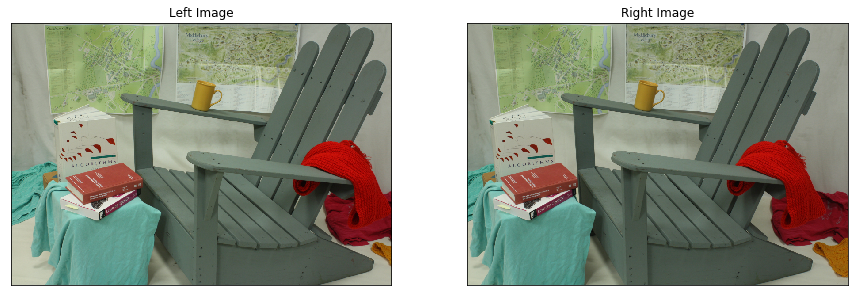

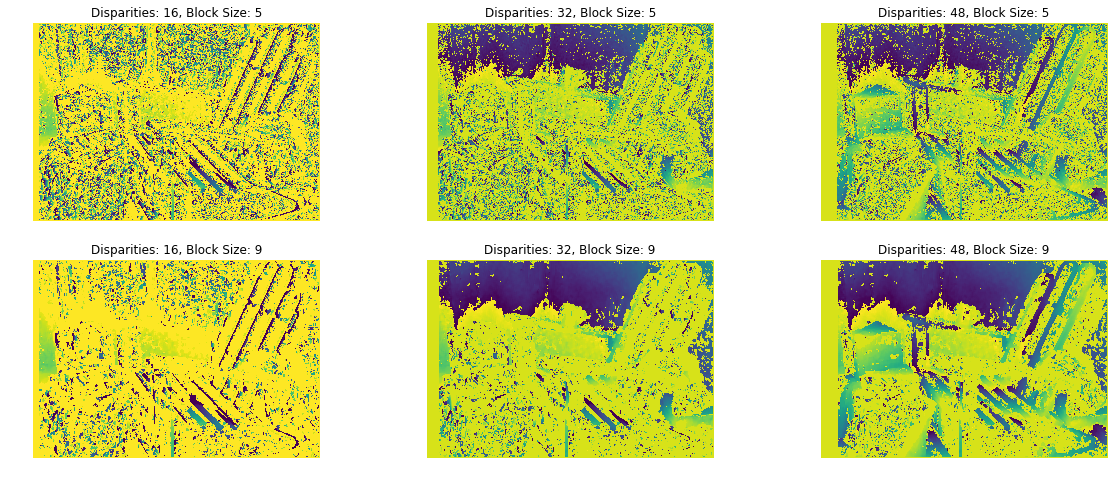

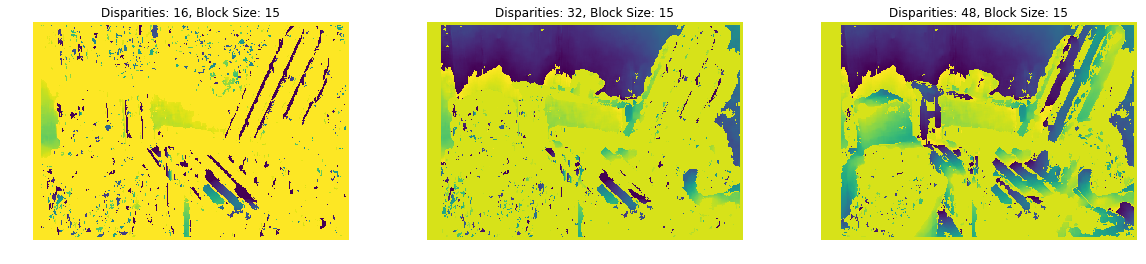

In [66]:
# load left and right images
img_left = cv2.imread('im0.png');
img_right = cv2.imread('im1.png');

# resize images for fast processing
img_left = cv2.resize(img_left, None, fx=0.3, fy=0.3)
img_right = cv2.resize(img_right, None, fx=0.3, fy=0.3)

# convert to grayscale
img_left_gray = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
img_right_gray = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

# compute disparity for each permutation
block_sizes, num_disparities, results = [5, 9, 15], [16, 32, 48], []

for b in block_sizes:
    for n in num_disparities:
        result = compute_disparity(img_left_gray, img_right_gray, n, b)
        results.append({
            'image': result,
            'num_disparities': n,
            'block_size': b,
            'title': 'Disparities: ' + str(n) + ', Block Size: ' + str(b)
        })

# display original images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title('Left Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title('Right Image'), plt.xticks([]), plt.yticks([])
plt.show()

# plot depth maps
plot_figs(results, 3)

#### For each depth-map, compute the pixel-wise squared diﬀerence error with respect to the ground-truth.

In [67]:
''' Provided function for reading a pfm file '''
def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
        img[img==np.inf] = 0
    return img

In [122]:
''' Compute the mean squared error between the two images '''
def compute_mse(imageA, imageB):
    num_pixel = float(imageA.shape[0] * imageA.shape[1])
    image
    error = (imageA  - imageB) ** 2
    print(error)
    print(error.mean())

    #     error /= float(imageA.shape[0] * imageA.shape[1])
    return error

[[ 5815.80901862  5841.35990641  5866.76213643 ...  9359.29490376
   9366.51321352  9368.95756992]
 [ 5803.42383173  5828.96927476  5853.73022664 ...  9350.03067404
   9358.39346673  9367.6972819 ]
 [ 5785.05423858  5812.66795574  5838.77781241 ...  4578.28493894
   9351.62030072  9356.20106968]
 ...
 [24010.56040037 24007.79925293 24008.34658351 ... 25318.53186384
  25319.06925245 25322.00880432]
 [24152.3509188  24149.2098746  24149.25967021 ... 25470.19101461
  25471.69978398 25475.30845666]
 [24293.60833088 24292.22008592 24286.45163756 ... 25626.96021944
  25630.19118787 25634.0738306 ]]
nan
[[ 6003.75519703  6006.83833609  6011.47639221 ...  9561.17683029
   9567.71367447  9569.03643674]
 [ 5992.9736914   5996.30822889  5999.705744   ...  9556.10064465
   9559.67292947  9554.89544751]
 [ 5982.34703896  5985.1113227   5988.30027146 ...  4721.75771177
   9550.06348971  9545.65415224]
 ...
 [24193.4213005  24200.85215721 24206.98790451 ... 25385.66535804
  25381.78860908 25377.20561

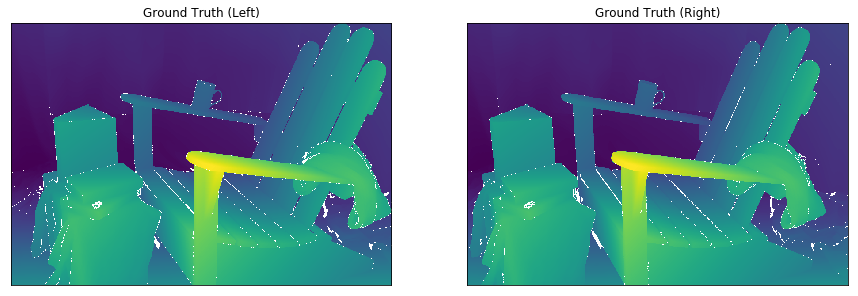

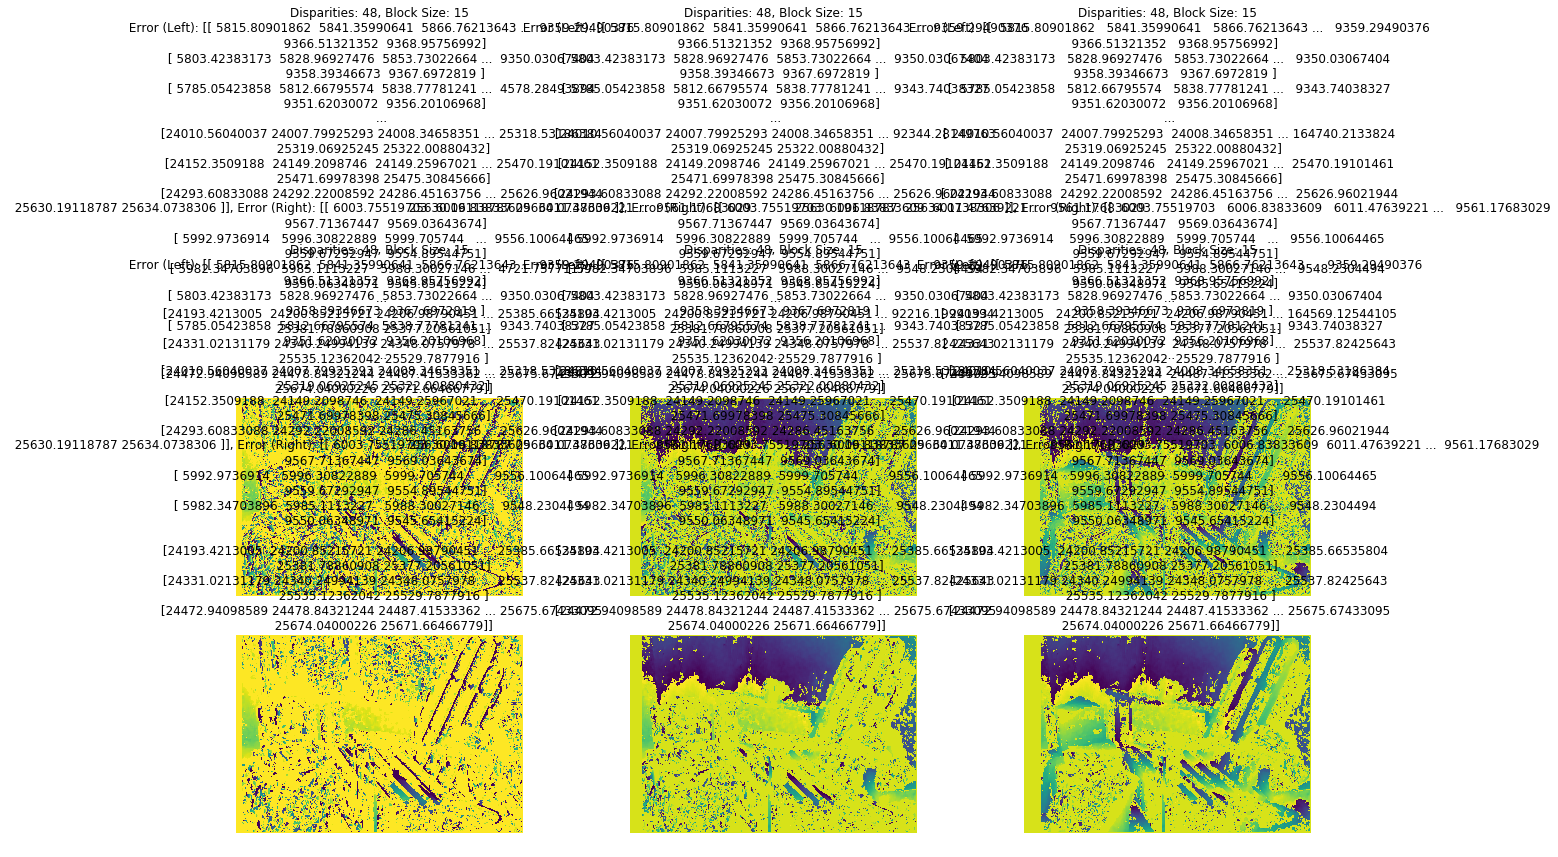

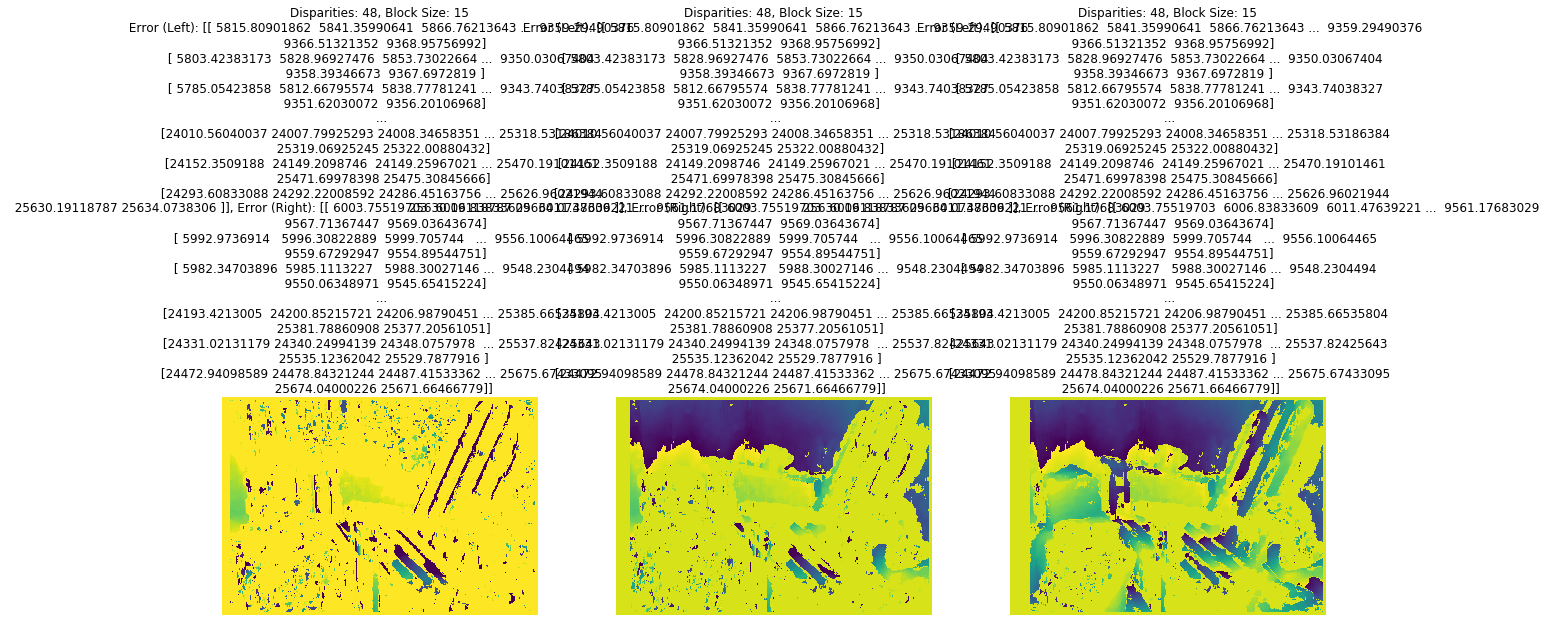

In [123]:
# read ground truth for left and right lens
ground_truth_left = read_pfm('disp0.pfm')
ground_truth_right = read_pfm('disp1.pfm')
# resize images for fast processing
ground_truth_left = cv2.resize(ground_truth_left, None, fx=0.3, fy=0.3)
ground_truth_right = cv2.resize(ground_truth_right, None, fx=0.3, fy=0.3)

# compute pixel-wise squared difference error
for i in range(len(results)):
    error_left = compute_mse(ground_truth_left, results[i]['image'])
    error_right = compute_mse(ground_truth_right, results[i]['image'])
    # update results dictionary
    results[i]['error_left'] = error_left
    results[i]['error_right'] = error_right
    results[i]['title'] = 'Disparities: ' + str(n) + ', Block Size: ' + str(b) + '\n Error (Left): ' + str(error_left) + ', Error (Right): ' + str(error_right) 

# display ground truths
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(ground_truth_left)
plt.title('Ground Truth (Left)'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(ground_truth_right)
plt.title('Ground Truth (Right)'), plt.xticks([]), plt.yticks([])
plt.show()

# plot with depth maps
plot_figs(results, 3)